In [2]:
import seaborn as sns
import csv
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors 
import pandas as pd
from scipy.stats import multivariate_normal
import math
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline


## Q4

In [10]:
men=np.array([11,13,24,14,20,34,25,22,49,8])
wom=np.array([9,41,10,21,23,25,37,27,15,7])
n1=len(men)
n2=len(wom)
m_mu=men.mean()
w_mu=wom.mean()
m_std=men.std()
w_std=wom.std()
print(m_std,w_std)

In [21]:
m_std/w_std

1.0585824330250924

As the ratio lies within 0.5-2 so we can safely assume the similarity of variance required to calculate the confidence interval for independent variables. 

In [18]:
N=(n1-1)*m_std*m_std + (n2-1)*w_std*w_std
D=n1+n2-2
Sp=np.sqrt(N/D)
SE = Sp*np.sqrt(1/n1 + 1/n2)
l_95 = [(m_mu -w_mu) - 2.10092*SE,(m_mu-w_mu) + 2.10092*SE]
l_99 = [(m_mu-w_mu) - 2.87844*SE,(m_mu-w_mu) + 2.87844*SE]

In [24]:
print(l_95,l_99)
print(m_mu-w_mu)
print(SE)

[-10.126793123757704, 11.126793123757704] [-14.05961502539322, 15.05961502539322]
0.5
5.058161721416191


Our best estimate of the difference, the point estimate, is 0.5lpa . The standard error of the difference is 5.058 lpa. We are 95% confident that the difference in mean difference in salary of men and women is between -10 and 11 lpa. In this sample, the men have higher mean salary than women by 0.5lpa. Based on this interval, we also conclude that there is no statistically significant difference in mean salaries between men and women, because the 95% confidence interval includes the null value, zero. Again, the confidence interval is a range of likely values for the difference in means. Since the interval contains zero (no difference), we do not have sufficient evidence to conclude that there is a difference.

## Q5

(100, 2)


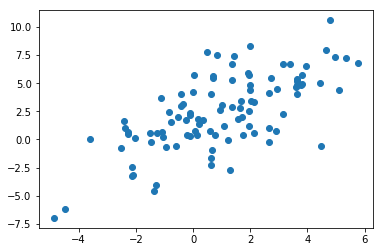

In [29]:
mean = [1,2]
var = [[4,4],[4,9]]
data = np.random.multivariate_normal(mean, var, 100)
random.seed(5)
print(data.shape)
plt.scatter(data[:,0],data[:,1])


In [31]:
data_1,sample_mean_1,sample_cov_1=gen_mean_var(1)
print('Sample mean:',sample_mean_1)
print('\n\nSample covariance matrix:\n',sample_cov_1)

Sample mean: [1.02349511 1.84475963]


Sample covariance matrix:
 [[3.96498951 4.01186168]
 [4.01186168 9.68214437]]


In [26]:
def gen_mean_var(N):
    sample_mean=np.zeros(2)
    sample_cov=[[0,0],[0,0]]
    sample_cov=np.array(sample_cov)
    for i in range(N):
        data = np.random.multivariate_normal(mean, var, 100)
        sample_mean =sample_mean + np.array([data[:,0].mean(),data[:,1].mean()])
        sample_cov = sample_cov + np.cov(data[:,0],data[:,1])

    sample_mean= sample_mean/N
    sample_cov = sample_cov/N
    return data,sample_mean,sample_cov

In [33]:
data_10,sample_mean_10,sample_cov_10=gen_mean_var(10)
print('Sample mean:',sample_mean_10)
print('\n\nSample covariance matrix:\n',sample_cov_10)

Sample mean: [0.96726569 1.92647381]


Sample covariance matrix:
 [[4.09362172 4.20629552]
 [4.20629552 9.26329393]]


In [41]:
N=[20,40,60,80,100,200,300,400,500]
cols=['N','Mean','Co-variance','Mean RMSE','Cov RMSE']
df = pd.DataFrame(columns=cols)
for n in N:
    df_list={}
    temp_data,temp_mean,temp_cov = gen_mean_var(n)
    df_list[cols[0]] = n
    df_list[cols[1]] = np.around(temp_mean,3)
    df_list[cols[2]] = np.around(temp_cov,3)
    df_list[cols[3]] = np.around(mean_squared_error(mean,temp_mean),3)
    df_list[cols[4]] = np.around(mean_squared_error(var,temp_cov),3)
    df=df.append(df_list,ignore_index=True)
# pd.set_option('display.max_columns', None)
df

,N,Mean,Co-variance,Mean RMSE,Cov RMSE
0,20,"[0.935, 1.986]","[[4.032, 4.082], [4.082, 9.286]]",0.002,0.024
1,40,"[0.985, 1.984]","[[4.086, 3.986], [3.986, 8.856]]",0.000,0.007
2,60,"[1.01, 2.008]","[[4.095, 4.092], [4.092, 9.009]]",0.000,0.007
3,80,"[0.99, 1.97]","[[4.054, 4.102], [4.102, 9.1]]",0.000,0.008
4,100,"[1.017, 1.984]","[[4.01, 3.979], [3.979, 8.886]]",0.000,0.003
5,200,"[1.012, 2.033]","[[3.999, 3.937], [3.937, 8.805]]",0.001,0.011
6,300,"[0.988, 1.976]","[[3.989, 3.974], [3.974, 8.94]]",0.000,0.001
7,400,"[1.004, 1.974]","[[4.024, 4.015], [4.015, 9.001]]",0.000,0.000
8,500,"[1.0, 1.997]","[[4.028, 4.041], [4.041, 9.097]]",0.000,0.003


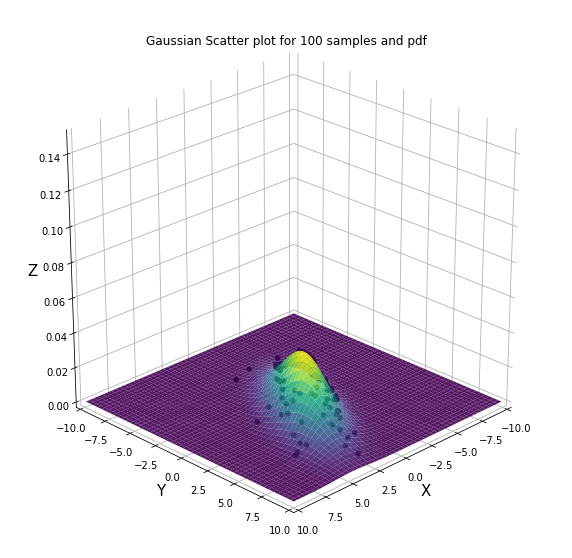

In [7]:
rv = multivariate_normal(mean, cov)
x_abs = 10
y_abs = 10
x_grid, y_grid = np.mgrid[-x_abs:x_abs:.1, -y_abs:y_abs:.1]
pos = np.empty(x_grid.shape + (2,))
pos[:, :, 0] = x_grid
pos[:, :, 1] = y_grid
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')
# # Removes the grey panes in 3d plots
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.plot_surface(x_grid, y_grid, rv.pdf(pos),cmap='viridis',linewidth=0,alpha=0.9,label='PDF function')
ax.scatter(val[:, 0], val[:, 1], rv.pdf(val), c='k',alpha=1,label='Simulated Sample')
# ax.legend(['PDF function','Simulated Sample'])
ax.set_title("Gaussian Scatter plot for 100 samples and pdf")
ax.set_xlim3d(-x_abs, x_abs)
ax.set_ylim3d(-y_abs, y_abs)
ax.set_zlim3d(0, 0.15)
ax.set_xlabel('X',fontsize=15)
ax.set_ylabel('Y',fontsize=15)
ax.set_zlabel('Z',fontsize=15)
# set viewing angle
ax.view_init(25, 45) 
plt.show()